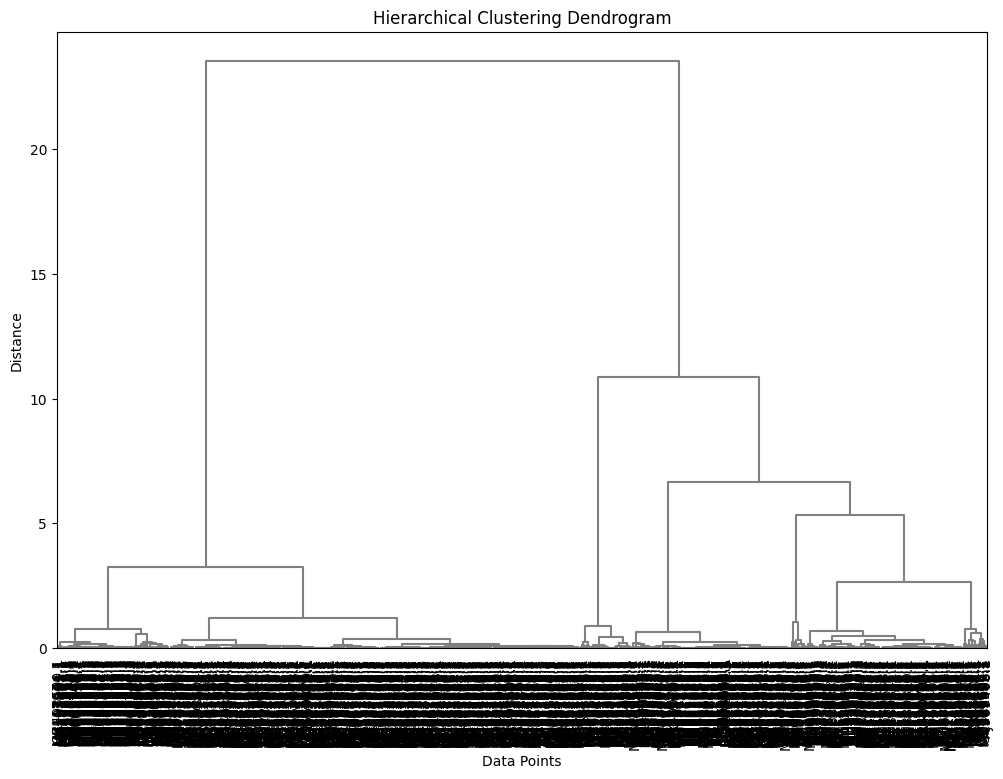

Unnamed: 0
PP826286.1    3
PP826288.1    3
OR490691.1    3
OR490692.1    3
OR490693.1    3
             ..
AF333969.1    2
AF181854.1    1
AF181853.1    3
M15076.1      3
X52400.1      2
Name: Cluster, Length: 1136, dtype: int32


In [24]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

class HierarchicalClustering:
    def __init__(self, data, linkage_method="ward"):
        """
        Initialize the hierarchical clustering class.

        Parameters:
        - data (pd.DataFrame): A DataFrame where rows are observations and columns are variables.
        - linkage_method (str): Linkage method to use ('ward', 'single', 'complete', 'average', etc.).
        """
        self.data = data
        self.linkage_method = linkage_method
        self.linkage_matrix = None

    def infer_color(self):
        """
        Infers colors for the dendrogram based on the 'verdict' column.

        Returns:
        - pd.Series: A Series mapping each row to a specific color.
        """
        category_colors = {
            'lineage4_5': 'blue',
            'lineage3': 'red',
            'lineage7': 'green',
            'lineage_2': 'purple'
        }
        if 'verdict' not in self.data.columns:
            raise ValueError("The 'verdict' column is required for color mapping.")
        return self.data['verdict'].map(category_colors)

    def compute_linkage(self):
        """Computes the linkage matrix for hierarchical clustering."""
        if self.data.isnull().values.any():
            raise ValueError("Data contains missing values. Please handle them before clustering.")

        # Extract only the variables for clustering
        clustering_data = self.data[['lineage3', 'lineage4_5', 'lineage7', 'lineage_2']]
        self.linkage_matrix = linkage(clustering_data, method=self.linkage_method)

    def color_func(self, cluster_id):
        """
        Custom color function for dendrogram branches.

        Parameters:
        - cluster_id (int): The index of the cluster or leaf.

        Returns:
        - str: Color for the dendrogram branch or leaf.
        """
        category_colors = {
            'lineage4_5': 'blue',
            'lineage3': 'red',
            'lineage7': 'green',
            'lineage_2': 'purple'
        }

        # Map each leaf to a color based on its verdict
        leaf_colors = self.data['verdict'].map(category_colors).tolist()

        # For leaves, return the color based on the mapping
        if cluster_id < len(leaf_colors):
            return leaf_colors[cluster_id]

        # For merged clusters, return a default color
        return 'grey'


    def plot_dendrogram(self, truncate_mode=None, p=12):
        """
        Plots the dendrogram for the hierarchical clustering.

        Parameters:
        - truncate_mode (str): Truncation mode for the dendrogram ('lastp', 'level', etc.).
        - p (int): Number of leaf nodes to display (used with truncate_mode='lastp').
        """
        if self.linkage_matrix is None:
            raise ValueError("Linkage matrix not computed. Run compute_linkage() first.")

        plt.figure(figsize=(12, 8))
        dendrogram(
            self.linkage_matrix,
            labels=self.data['Unnamed: 0'].values,
            leaf_rotation=90,
            leaf_font_size=10,
            link_color_func=self.color_func  # Use the updated color function
        )
        plt.title("Hierarchical Clustering Dendrogram")
        plt.xlabel("Data Points")
        plt.ylabel("Distance")
        plt.show()


    def get_clusters(self, n_clusters):
        """
        Returns cluster labels for the data points.

        Parameters:
        - n_clusters (int): The desired number of clusters.

        Returns:
        - pd.Series: A Series mapping data point indices to their cluster labels.
        """
        if self.linkage_matrix is None:
            raise ValueError("Linkage matrix not computed. Run compute_linkage() first.")

        cluster_labels = fcluster(self.linkage_matrix, t=n_clusters, criterion="maxclust")
        return pd.Series(cluster_labels, index=self.data['Unnamed: 0'], name="Cluster")

# Example usage:
data = pd.read_csv("outputs/predictions/All_LASV_06_07_24_LASV_lin_pred.csv")

hc = HierarchicalClustering(data)
hc.compute_linkage()
hc.plot_dendrogram()
clusters = hc.get_clusters(n_clusters=3)
print(clusters)


/var/folders/95/gt0pqtjx3r76yhhy2b1fc02c0000gp/T/ipykernel_52653/2718211731.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  self.color_palette = plt.cm.get_cmap("tab10", num_categories)  # For up to 10 distinct colors


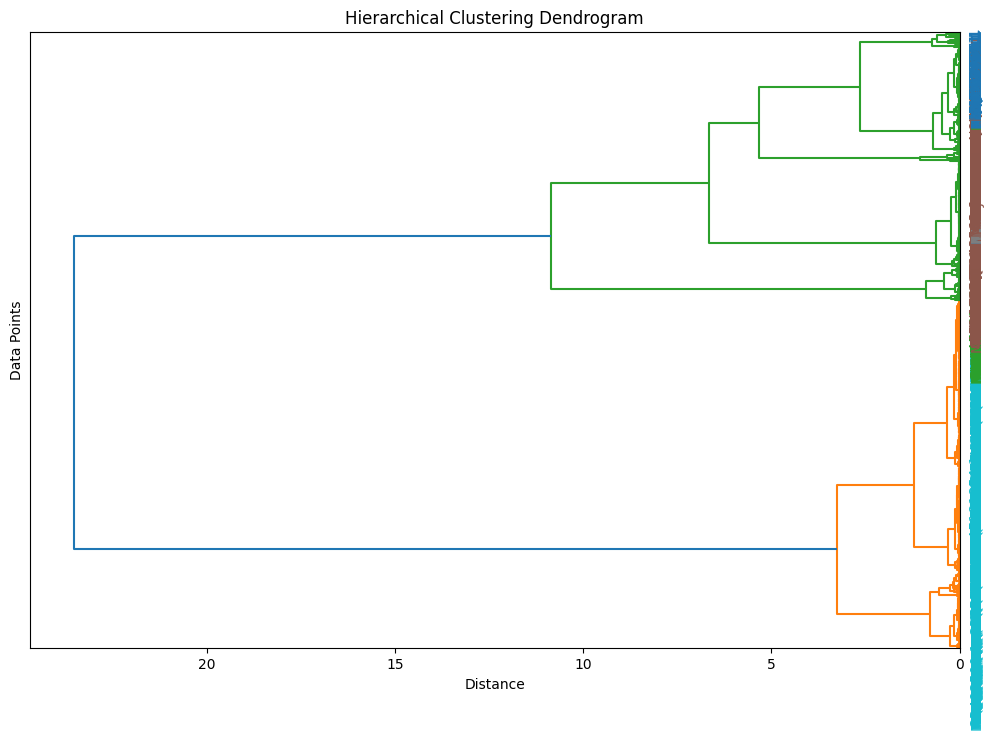

Unnamed: 0
PP826286.1    3
PP826288.1    3
OR490691.1    3
OR490692.1    3
OR490693.1    3
             ..
AF333969.1    2
AF181854.1    1
AF181853.1    5
M15076.1      3
X52400.1      2
Name: Cluster, Length: 1136, dtype: int32


In [21]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

class HierarchicalClustering:
    def __init__(self, data, linkage_method="ward"):
        self.data = data
        self.linkage_method = linkage_method
        self.linkage_matrix = None
        self.color_palette = None
        self.color_mapping = None

    def infer_color_palette(self):
        if 'verdict' not in self.data.columns:
            raise ValueError("The 'verdict' column is required for color mapping.")

        # Convert 'verdict' to a categorical variable and create a color palette
        self.data['verdict'] = pd.Categorical(self.data['verdict'])
        unique_categories = self.data['verdict'].cat.categories
        num_categories = len(unique_categories)

        # Use a distinct colormap like tab10 or tab20
        self.color_palette = plt.cm.get_cmap("tab10", num_categories)  # For up to 10 distinct colors

        # Create a mapping from categories to colors
        self.color_mapping = {
            category: self.color_palette(i)
            for i, category in enumerate(unique_categories)
        }

    def compute_linkage(self):
        """Computes the linkage matrix for hierarchical clustering."""
        if self.data.isnull().values.any():
            raise ValueError("Data contains missing values. Please handle them before clustering.")

        # Extract only the variables for clustering
        clustering_data = self.data[['lineage3', 'lineage4_5', 'lineage7', 'lineage_2']]
        self.linkage_matrix = linkage(clustering_data, method=self.linkage_method)

    def plot_dendrogram(self, truncate_mode=None, p=12):
        if self.linkage_matrix is None:
            raise ValueError("Linkage matrix not computed. Run compute_linkage() first.")
        if self.color_mapping is None:
            raise ValueError("Color mapping not created. Run infer_color_palette() first.")

        plt.figure(figsize=(12, 8))
        dendrogram(
            self.linkage_matrix,
            labels=self.data['Unnamed: 0'].values,
            leaf_rotation=90,
            leaf_font_size=10,
            orientation="left",
            # color_threshold=10, 
            # above_threshold_color='grey'
        )

        # Apply custom colors to the labels
        ax = plt.gca()
        xlbls = ax.get_ymajorticklabels()
        for lbl in xlbls:
            # Find the corresponding category for the label
            label_text = lbl.get_text()
            category = self.data.loc[self.data['Unnamed: 0'] == label_text, 'verdict'].values[0]
            lbl.set_color(self.color_mapping[category])

        plt.title("Hierarchical Clustering Dendrogram")
        plt.xlabel("Distance")
        plt.ylabel("Data Points")
        plt.show()

    def get_clusters(self, n_clusters):
        if self.linkage_matrix is None:
            raise ValueError("Linkage matrix not computed. Run compute_linkage() first.")

        cluster_labels = fcluster(self.linkage_matrix, t=n_clusters, criterion="maxclust")
        return pd.Series(cluster_labels, index=self.data['Unnamed: 0'], name="Cluster")


data = pd.read_csv("outputs/predictions/All_LASV_06_07_24_LASV_lin_pred.csv")

hc = HierarchicalClustering(data)
hc.infer_color_palette()
hc.compute_linkage()
hc.plot_dendrogram()
clusters = hc.get_clusters(n_clusters=5)
print(clusters)
